<a href="https://colab.research.google.com/github/christianbusalanan/Math-for-Machine-Learning-Linear-Algebra/blob/main/MO_IT125_Homework_Data_Preprocessing_of_Machine_Learning_Solution_Project_Dataset_BSIT_S3103_Busalanan%2C_C_N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Finmark Corporation
**Problem Statement**: FinMark Corporation has a wealth of data collected from various sources, including customer transactions, social media interactions, and demographic information. However, the company struggles to derive meaningful insights due to data overload and inconsistencies. The current customer segmentation strategies are outdated, and there is a lack of clarity on market trends and customer behaviors.

**Project Deliverables**: Over the next 12 weeks, the company wants you to develop a machine learning solution to address these challenges. The composition of the machine learning solution is as follows:
1. Exploratory Data Analysis (EDA) - explores the main characteristics of the collected data, identifies key patterns, and detects anomalies in the FinMark Corporation datasets.

2. Data Visualization -  discovers relationships between variables and identifies patterns and trends in the FinMark Corporation datasets.

3. Presentation of Machine Learning Solution Project - a presentation of your development process and findings.

## Customer Segments

In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset
cust_demo= pd.read_csv('customer_demographics_contaminated.csv')
cust_demo.head(10)

,CustomerID,Age,Gender,Location,IncomeLevel,SignupDate
0,9207fa75-5758-48d1-94ad-19c041e0520f,51,Female,Jensenberg,Low,2022-11-17
1,5fb09cd8-a473-46f7-80bd-6e49cf509078,NaN,Female,Castilloport,High,2020-07-21
2,c139496e-cc89-498a-bd90-1fb4627b6cff,37,Male,Lake Jennifertown,NaN,2021-01-01
3,50118139-7264-428f-81cc-a25fddc5d6dd,44,Male,Port Carl,Medium,2024-06-10
4,7d1f2bbc-8d16-4fbc-9b37-ece3324e8ed4,50,Female,Jessebury,High,2023-08-24
5,2de49c7c-32ae-4ba8-b058-622a090d7094,53,Female,Emilyville,Low,2022-02-13
6,89f7de44-e592-43c6-b033-bcbcf24088ba,NaN,Female,South Derekbury,High,2019-12-08
7,9f2128cd-2f2b-4f71-987c-29fd045021f0,NaN,Female,Lake Erin,Medium,2022-04-26
8,fbcd7128-ce04-4799-8c1c-722330507b96,NaN,Female,New Reginabury,NaN,2022-04-17
9,40f5a5dd-a46f-4a5e-8c0f-fe04389ddec8,NaN,Female,Mariaberg,High,2024-02-18


In [23]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3023 entries, 0 to 3195
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerID   3023 non-null   object        
 1   Age          3023 non-null   float64       
 2   Gender       3023 non-null   object        
 3   Location     3023 non-null   object        
 4   IncomeLevel  3023 non-null   object        
 5   SignupDate   3023 non-null   datetime64[ns]
 6   SignupYear   3023 non-null   int32         
 7   SignupMonth  3023 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(5)
memory usage: 200.7+ KB


In [3]:
#Dropping duplicates
cust_demo.drop_duplicates(inplace=True)

# Cleaning Age Column
cust_demo['Age'] = pd.to_numeric(cust_demo['Age'], errors='coerce')
median_age = cust_demo['Age'].median()
cust_demo['Age'].fillna(median_age, inplace=True)
cust_demo['Age'] = cust_demo['Age'].astype(int)

# Cleaning the one row with the value '-1' as its age
cust_demo['Age']= cust_demo['Age'].replace(-1, median_age)

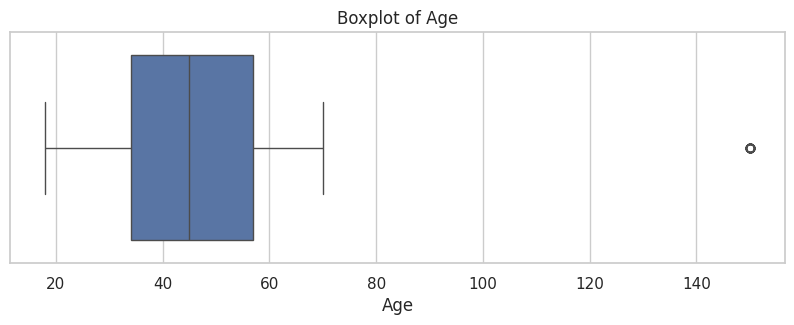

In [4]:
# Visualizing the Outliers
sns.set(style="whitegrid")
plt.figure(figsize=(10,3))
sns.boxplot(data= cust_demo, x= 'Age')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

In [5]:
#Replacing the outliers with the 95th percentile
percentile_95 = cust_demo['Age'].quantile(0.95)
cust_demo['Age'] = np.where(cust_demo['Age'] > percentile_95, percentile_95, cust_demo['Age'])

In [6]:
# Replacing missing values with 'Unknown'
cust_demo['IncomeLevel']= cust_demo['IncomeLevel'].fillna('Unknown')
cust_demo['IncomeLevel'].value_counts()

,count
IncomeLevel,
High,946
Low,923
Medium,869
Unknown,285


In [7]:
# Setting Signup Data to datetime datatype
cust_demo['SignupDate'] = pd.to_datetime(cust_demo['SignupDate'], format='mixed')

**Average Age per Gender**

In [8]:
cust_demo.groupby('Gender')['Age'].mean()

,Age
Gender,
Female,45.303665
Male,44.460870


**Countplot of each income level**

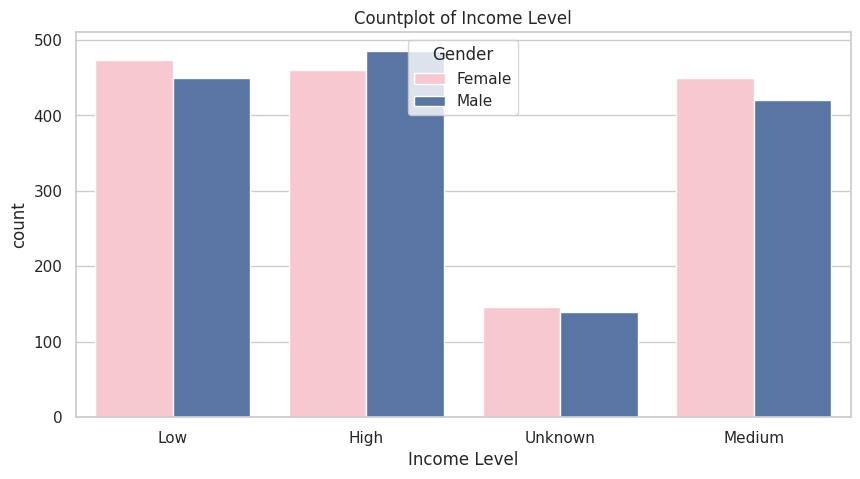

In [9]:
plt.figure(figsize= (10, 5))
sns.countplot(data= cust_demo, x= 'IncomeLevel', hue= 'Gender',  palette= {'Male': 'b', 'Female': 'pink'})
plt.title('Countplot of Income Level')
plt.xlabel('Income Level')
plt.show()

**Signup Trend Over Time**

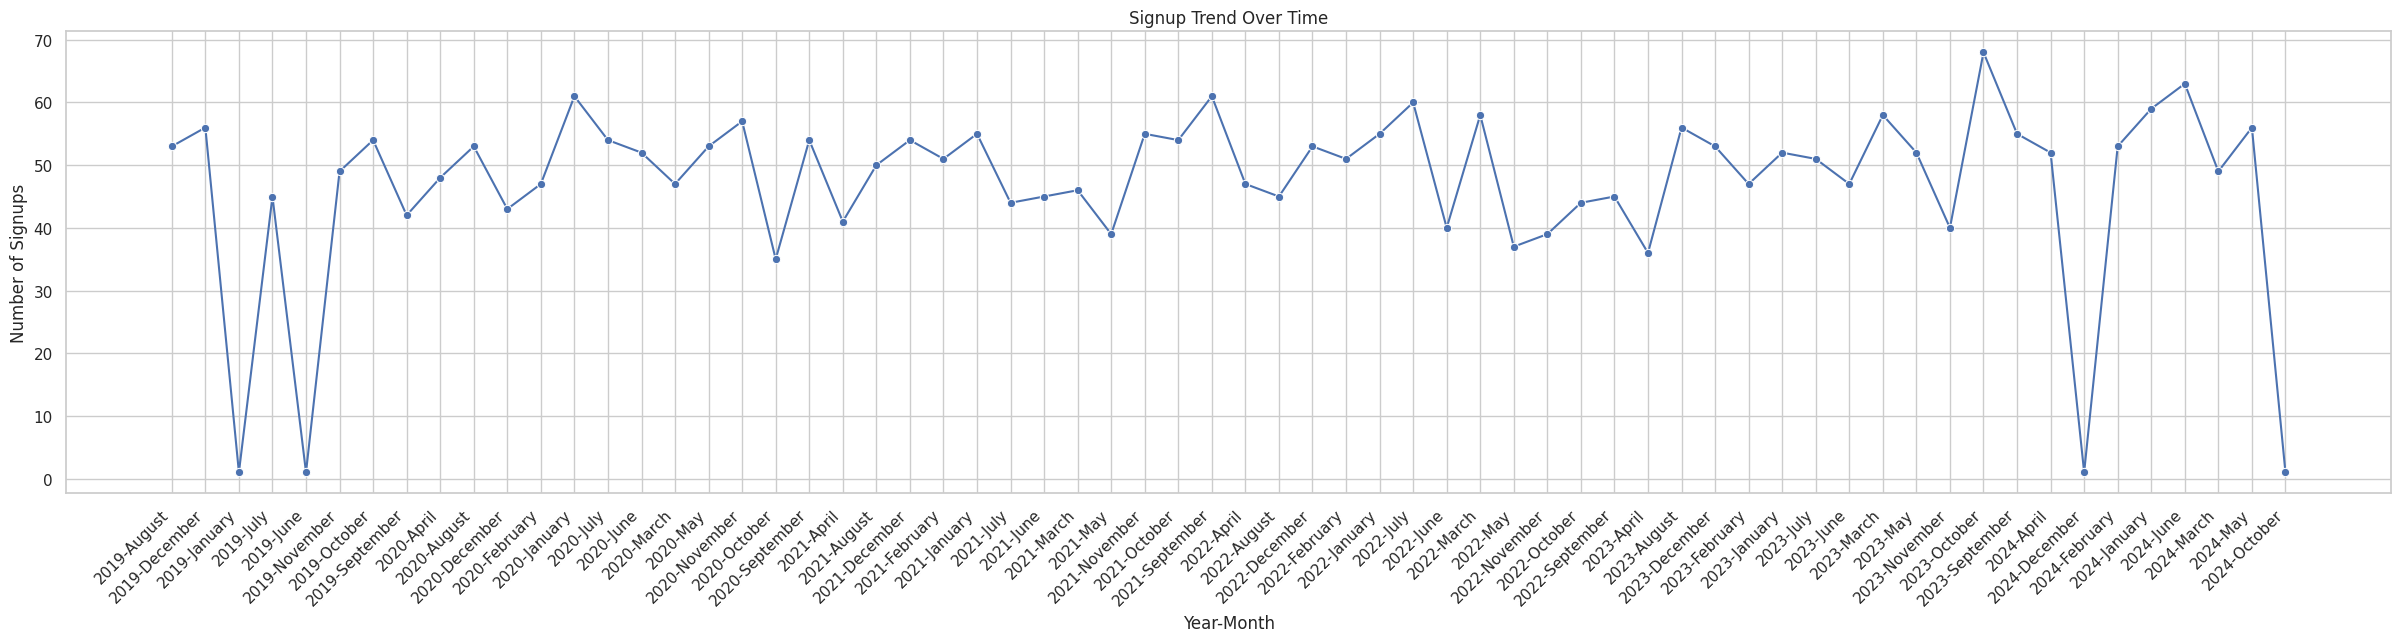

In [10]:
cust_demo['SignupYear'] = cust_demo['SignupDate'].dt.year
cust_demo['SignupMonth'] = cust_demo['SignupDate'].dt.month_name()
signup = cust_demo.groupby(['SignupYear','SignupMonth']).size()
signup = signup.reset_index(name='Count')
signup['YearMonth'] = signup['SignupYear'].astype(str) + '-' + signup['SignupMonth'].astype(str)
plt.figure(figsize=(30, 6))
sns.lineplot(x='YearMonth', y='Count', data=signup, marker='o')
plt.title('Signup Trend Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45, ha='right')
plt.show()



In [24]:
cust_demo.to_csv('cleaned_customer_demographics.csv', index=False)

## Customer Transactions

In [11]:
# Loading the Customer Transaction dataset
cust_tran= pd.read_csv('customer_transactions_contaminated.csv')
cust_tran.head(10)

,CustomerID,TransactionID,TransactionDate,Amount,ProductCategory,PaymentMethod
0,60567026-f719-4cd6-849e-137e86d8938f,5ff75116-0a50-4d04-80fb-31e5ccbb0769,2024-05-15,117.64,Clothing,PayPal
1,4090ba85-b111-4f75-a792-c777965f5255,2c39b9fe-ff57-4d39-9321-9f5cdf187aa1,2023-04-26,466.14,Health & Beauty,Bank Transfer
2,9223891b-73ff-4d5c-b8ae-13ece82ee28b,f79588dd-3db9-4ffa-97f8-7de0e64259f1,2022-09-23,563.99,Clothing,Debit Card
3,9243eebc-938f-480c-8564-16d503d250de,401c0fc9-60df-4455-ad78-67c132f9897d,2024-04-15,254.44,Automotive,PayPal
4,6e3e8eb8-bc0f-4ffe-9f74-5d5efec9502f,2034aebc-8280-4254-a667-92bcd1c2be4f,2024-06-03,590.52,Home & Garden,Bank Transfer
5,3eccdcf9-e8ce-4e44-9f62-8bef88e70672,78dfb45e-16e0-4ecc-8f67-f2e210c31c3e,2024-04-07,Free,NaN,Credit Card
6,7fbc5847-a652-4fc8-a7d8-5e85d846e91b,591f1ea2-c97d-44dd-9539-71ac89b94ff3,2024-01-12,NaN,Automotive,PayPal
7,958e5c8d-48ca-42dd-bb71-a766a374233a,fb24e098-3ab9-40a2-bcc3-b8ebb23f549a,2023-03-10,399.7,Home & Garden,PayPal
8,39c6e7d2-6c4b-44c0-8961-ddc1ecbdb0c6,833b026a-7c02-4101-832d-62c07569b0f6,2024-01-26,296.99,Clothing,PayPal
9,474f9233-0616-431b-b3e9-a6feabe68abb,f8bde21a-7a6b-41f6-ac39-eeb77640fa9b,2023-06-15,149.39,Clothing,Debit Card


In [22]:
cust_tran.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3015 entries, 0 to 3177
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       3015 non-null   object 
 1   TransactionID    3015 non-null   object 
 2   TransactionDate  3015 non-null   object 
 3   Amount           3015 non-null   float64
 4   ProductCategory  3015 non-null   object 
 5   PaymentMethod    3015 non-null   object 
dtypes: float64(1), object(5)
memory usage: 164.9+ KB


In [13]:
#Dropping Duplicates
cust_tran.drop_duplicates(inplace=True)

In [14]:
# Replacing 'Free' with the median value of Amount
cust_tran['Amount'] = cust_tran['Amount'].replace('Free', None)
cust_tran['Amount'] = cust_tran['Amount'].replace('', None)
cust_tran['Amount']= cust_tran['Amount'].astype(float)

# Replacing '-100' with the 5th percentile
percentile_5 = cust_tran['Amount'].quantile(0.05)
cust_tran['Amount'] = cust_tran['Amount'].replace(-100, percentile_5)

# Replacing missing values with the median
cust_tran['Amount'] = cust_tran['Amount'].fillna(cust_tran['Amount'].median())
amount_median = cust_tran['Amount'].median()
cust_tran['Amount'] = cust_tran['Amount'].fillna(amount_median)

In [15]:
# Replacing the null value with "Unknown"
cust_tran['ProductCategory'] = cust_tran['ProductCategory'].fillna('Unknown')

In [25]:
cust_tran.to_csv('cleaned_customer_transactions.csv', index= False)

## Social Media Interactions

In [16]:
# Loading the Dataset
social_media= pd.read_csv('social_media_interactions_contaminated.csv')
social_media.head(10)

,CustomerID,InteractionID,InteractionDate,Platform,InteractionType,Sentiment
0,2dcb9523-356b-40b2-a67b-1f27797de261,e5d15761-d0a7-4329-89e3-79a892c56097,2023-07-11,NaN,Comment,NaN
1,e12c37b3-7d4d-472f-9fd8-0df2cb3001aa,02f9f376-70ae-4fcd-9070-1db977939948,2023-07-06,Twitter,Share,NaN
2,08a911a3-65e6-4f5d-a6a1-ae7ddcbe28a2,a83fa04c-f109-4f24-8ce1-2078154f6a1c,2024-05-24,Instagram,Comment,Neutral
3,efdfdfc9-5dbb-4478-911a-101a390a0285,28a69c4b-a2e4-4c74-a130-1132d7733fdf,2023-11-01,Instagram,Like,Neutral
4,ca1e90f6-0e5f-492e-ab92-252ff540da18,d9d1c6f8-5e15-4738-b52b-13c2982420cc,2023-07-08,Instagram,Like,NaN
5,3e44871b-f56c-4576-b1ca-d1dc999e2166,0c409883-8396-48e4-83fb-887329848696,2023-12-18,Instagram,Comment,Positive
6,aa5eea4b-c948-41f4-9285-229a470002aa,4034dadf-6541-40d6-a7f0-16b20a009c04,2023-11-15,Instagram,Share,Positive
7,7d83304d-2501-4c9f-ba63-a1a14343e51f,bcfc43e7-c5aa-4dbd-9961-0e108784b199,2024-03-29,Instagram,Comment,NaN
8,bd90f5cb-05a7-40f4-acb1-eedf48b58ffa,d2a06664-703d-4bc1-9401-a06f8c43fda5,2024-05-02,NaN,Like,Neutral
9,63ee220c-19ae-4113-b45c-276b22b068e1,67cdfb0b-3da6-46b8-a1f4-03b2abc81f58,2023-11-18,NaN,Comment,Positive


In [20]:
social_media.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3020 entries, 0 to 3194
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       3020 non-null   object
 1   InteractionID    3020 non-null   object
 2   InteractionDate  3020 non-null   object
 3   Platform         3020 non-null   object
 4   InteractionType  3020 non-null   object
 5   Sentiment        2711 non-null   object
dtypes: object(6)
memory usage: 165.2+ KB


In [18]:
# Dropping duplicates
social_media.drop_duplicates(inplace=True)

In [19]:
# Replacing null values with 'Other'
social_media['Platform']= social_media['Platform'].fillna('Other')

In [26]:
social_media.to_csv('cleaned_social_media_interactions.csv', index= False)